# Credit Card Fraud Detection - Comprehensive Evaluation Using Appropriate Metrics

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

## Class Imbalance Handling Strategies

4 different strategies:<br>
1. Original Class Distribution
2. SMOTE
3. Borderline SMOTE
4. Combination of SMOTE and Undersampling

were used to handle class imbalance.
Following are the barplots for class distribution from each strategy.

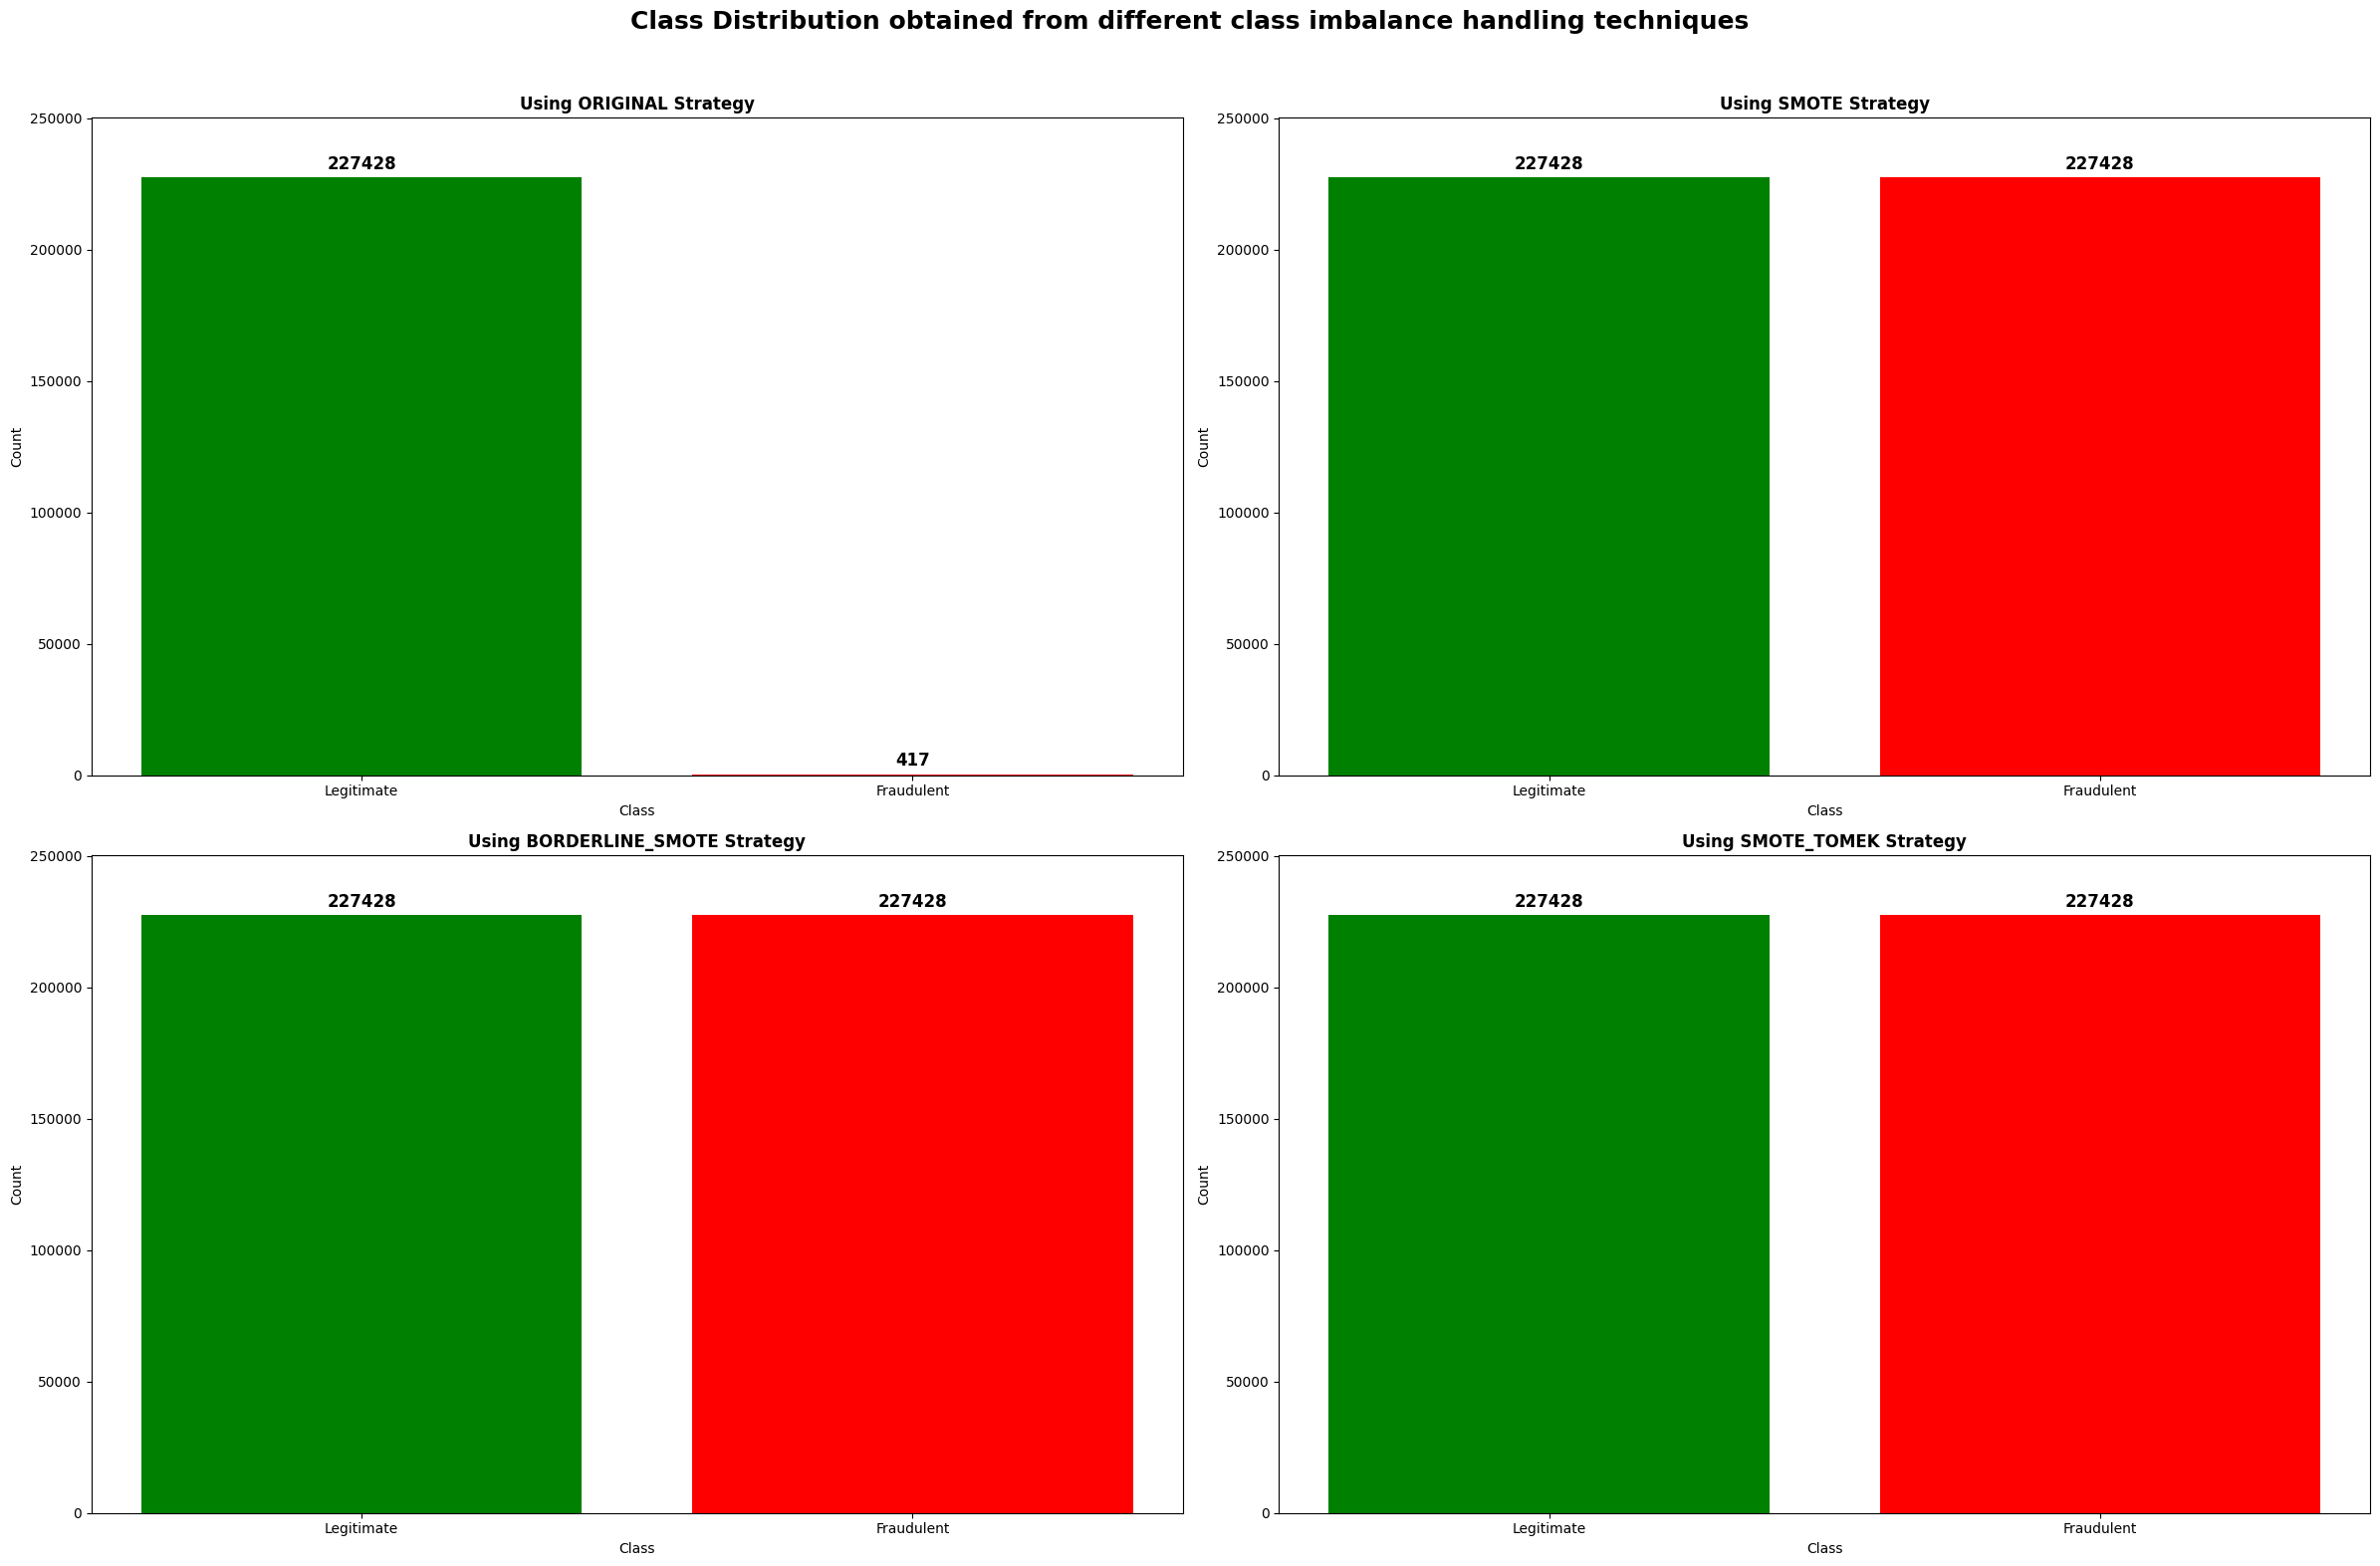

In [61]:
# Load the JSON file
with open('../data/imbalance_handling_strategies.json', 'r') as f:
    imbalance_handling_strategies = json.load(f)

# Convert to DataFrame
imbalance_handling_strategies_df = (pd.DataFrame(imbalance_handling_strategies)).T

# display(imbalance_handling_strategies_df)

# Plot barplots
strategies = imbalance_handling_strategies_df.index.tolist()
# display(strategies)
# Plot barplots for each strategy's class distribution
fig, axes0 = plt.subplots(2, 2, figsize=(24, 16))
axes0 = axes0.flatten()

for i, strategy in enumerate(strategies):
    counts = imbalance_handling_strategies_df.loc[strategy]
    bars = axes0[i].bar(counts.index, counts.values, color=['green', 'red'])
    axes0[i].set_title(f"Using {strategy.upper()} Strategy", fontweight='bold')
    axes0[i].set_ylabel("Count")
    axes0[i].set_xlabel("Class")
    axes0[i].set_ylim(0, max(imbalance_handling_strategies_df.max()) * 1.1)
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        axes0[i].annotate(f'{int(height)}',
                          xy=(bar.get_x() + bar.get_width() / 2, height),
                          xytext=(0, 3),  # 3 points vertical offset
                          textcoords="offset points",
                          ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.suptitle("Class Distribution obtained from different class imbalance handling techniques",fontsize=18, fontweight='bold')
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()


The figure above shows number of data points in each class after applying some oversampling techniques.

## Model Training and Selection based on results from Cross Validation
Three different models:
1. Logistic Regression
2. Decision Trees
3. Random Forests

were trained using Cross Validation for each of the strategies.
Following is the visualization of results from each strategy and from each model.

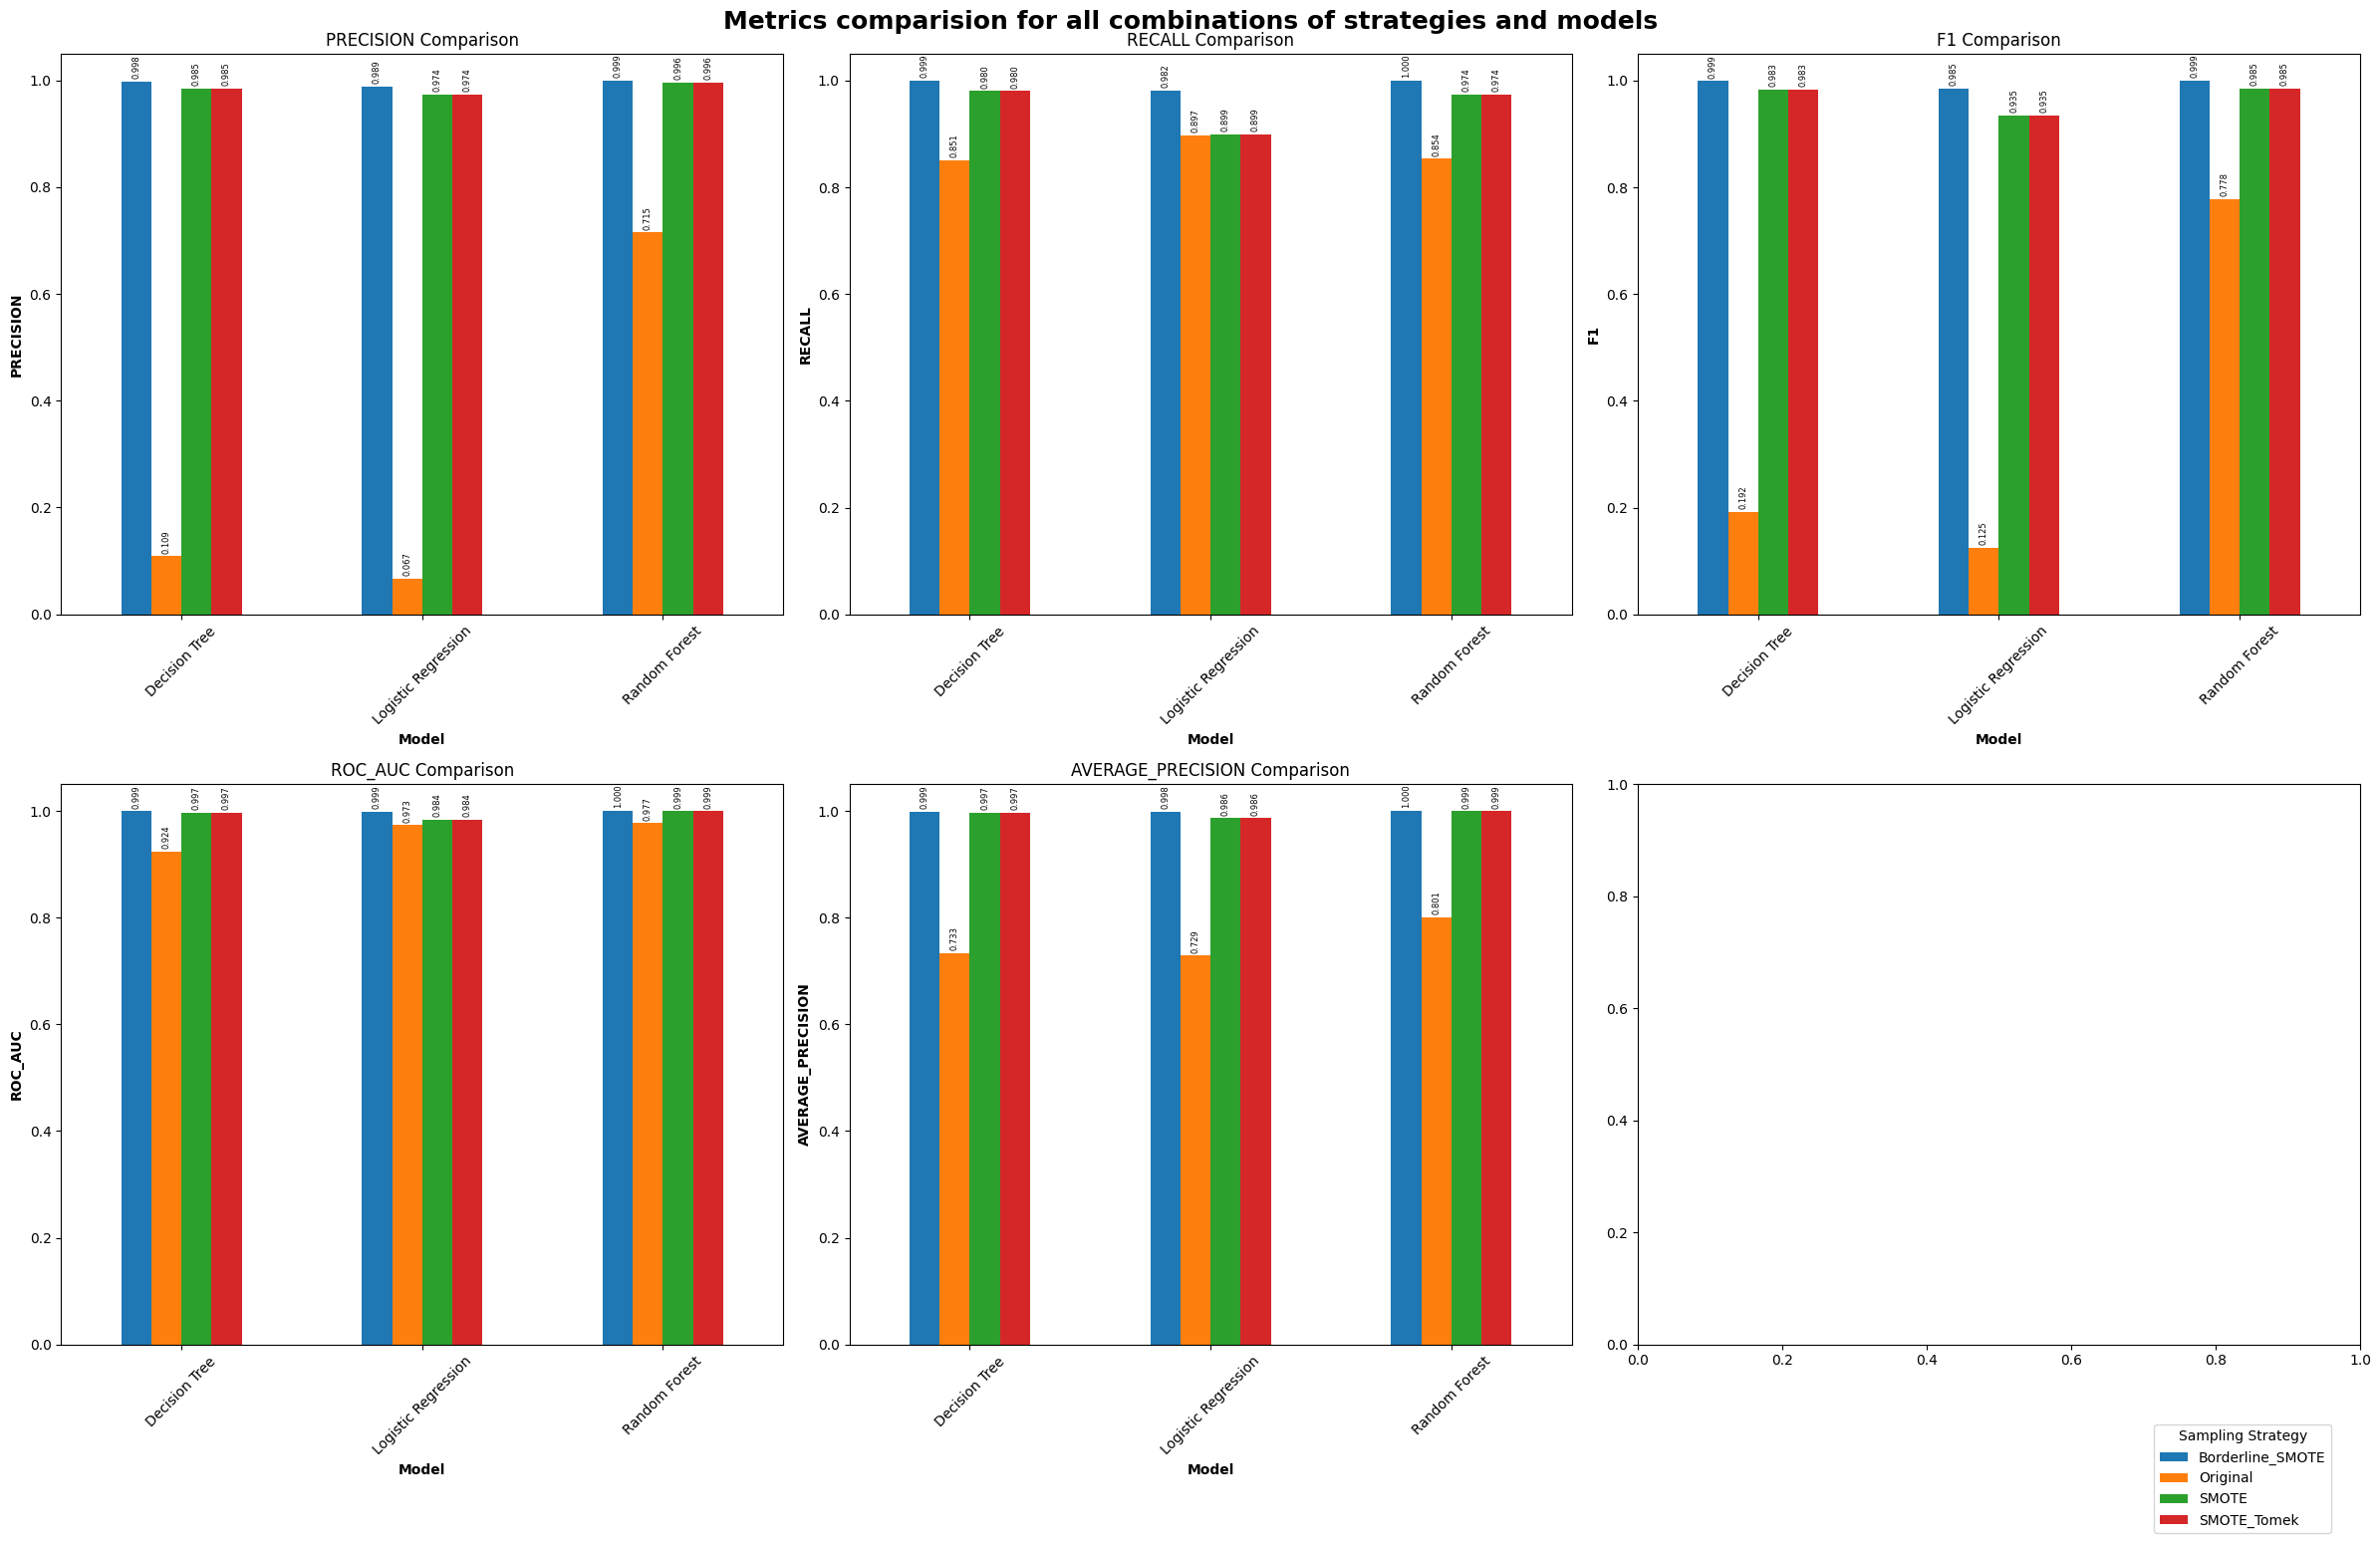

In [73]:
# Load the JSON file
with open('../performance-measures/cv_metrics_data.json', 'r') as f:
    results_comparision = json.load(f)

# display(comparision)

# Create a dataframe to visualize the results
results_df = []
for strategy in results_comparision:
    for model in results_comparision[strategy]:
        for metric in results_comparision[strategy][model]:
            results_df.append(
                {
                    'Strategy': strategy,
                    'Model': model,
                    'Metric': metric,
                    'Score': results_comparision[strategy][model][metric]['mean'],
                    'Std': results_comparision[strategy][model][metric]['std']
                }
            )
results_df = pd.DataFrame(results_df)
# display(results_df)

fig, axes1 = plt.subplots(2, 3, figsize=(24, 16))

metrics_to_plot = ['precision', 'recall', 'f1', 'roc_auc', 'average_precision']

for i, metric in enumerate(metrics_to_plot):
    pivot_data = results_df[results_df['Metric'] == metric].pivot(
        index='Model', columns='Strategy', values='Score'
    )
    ax = axes1[i // 3, i % 3]
    bars = pivot_data.plot(kind='bar', ax=ax, title=f"{metric.upper()} Comparison", legend=False)
    ax.set_xlabel("Model", fontweight="bold")
    ax.set_ylabel(metric.upper(), fontweight="bold")
    ax.tick_params(axis='x', rotation=45)
    # Add value labels on top of each bar
    for container in bars.containers:
        bars.bar_label(container, fmt='%.3f', fontsize=6,rotation=90, label_type='edge', padding=2)


handles, labels = axes1[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Sampling Strategy", loc='lower right', bbox_to_anchor=(0.98, 0.02))
plt.suptitle("Metrics comparision for all combinations of strategies and models",fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

The figure above shows the values of some key performance metrics for fraud detection obtained after <b>Stratified 5 Fold Cross Validation</b>.<br>
The Performance Metrics considered:
1. Precision
2. Recall
3. F1-Score
4. ROC-AUC
5. Average Precision

The figure shows these values for each sampling strategy and each model considered.

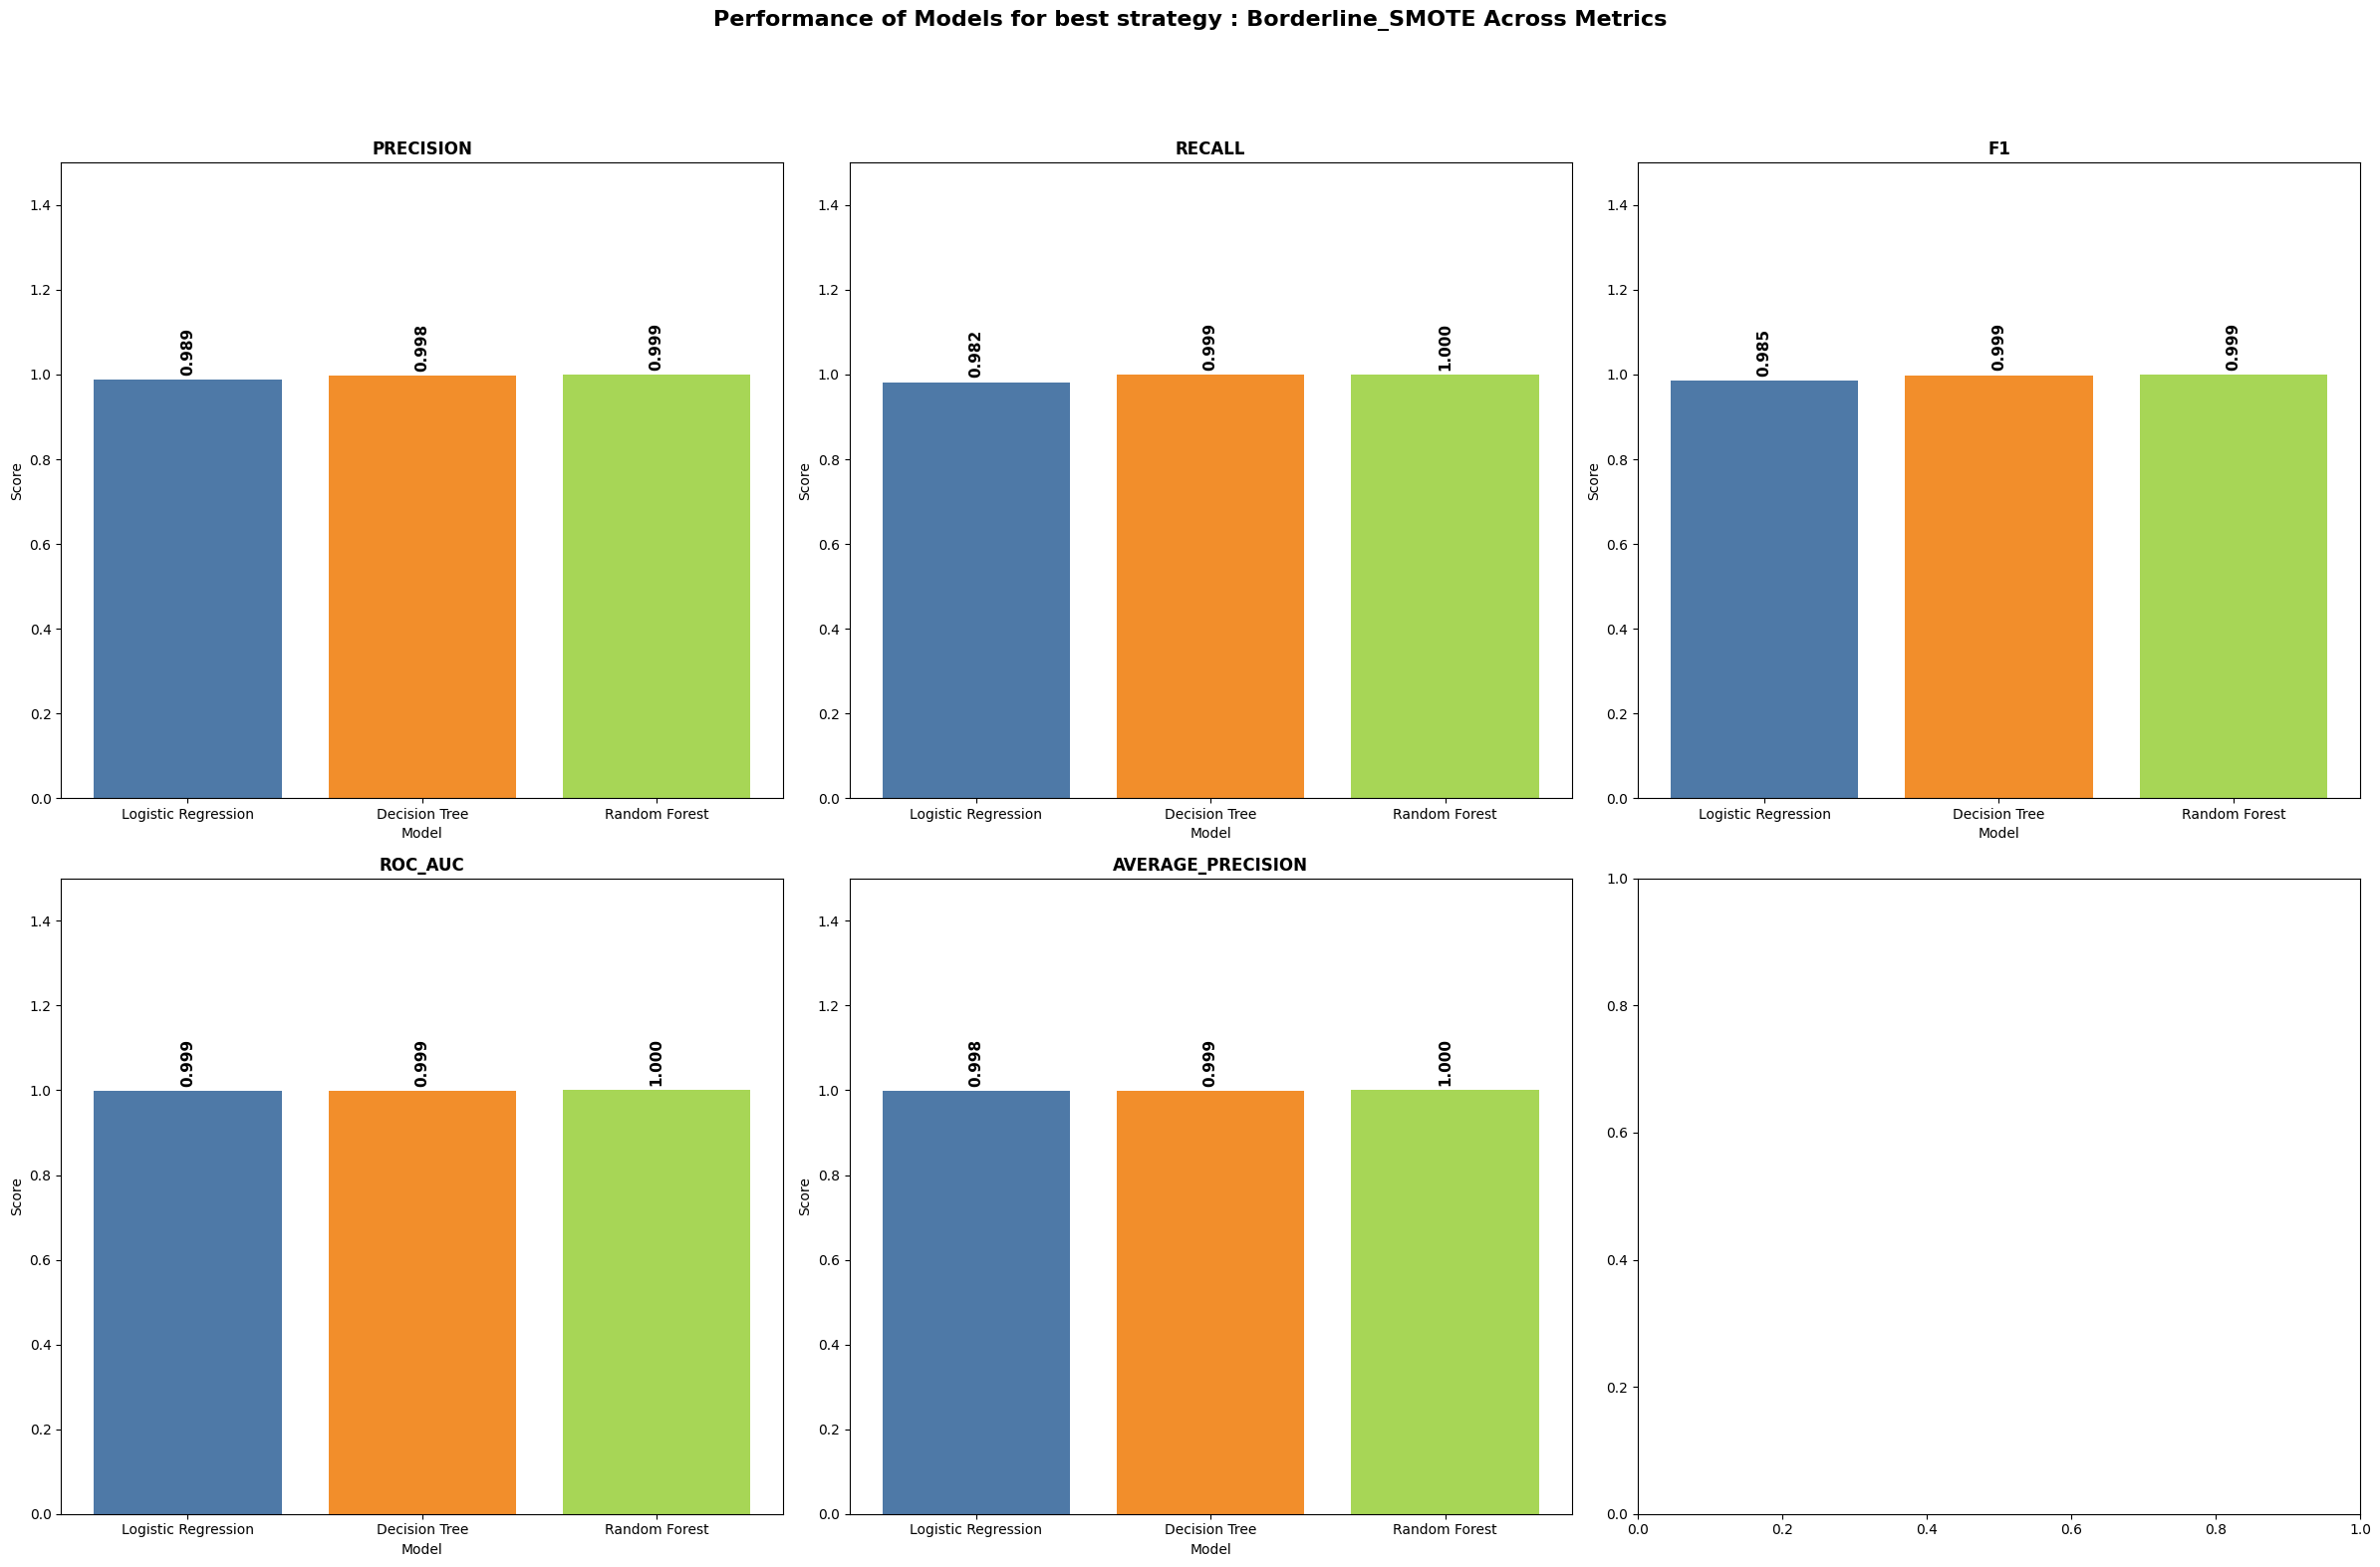

In [ ]:
# plotting for best strategy and best 2 models

# best strategy based on F1-Score
f1_results = results_df[results_df['Metric']=='f1'].pivot(index = 'Model', columns = 'Strategy', values = 'Score')
f1_results = f1_results.round(4)
# extract best strategy and 3 models
best_strategy = f1_results.mean().idxmax()
best_models = f1_results[best_strategy].nlargest(3).index.tolist()

# Plot metrics for only these two
# Filter the results for the best strategy and top 2 models
filtered_df = results_df[
    (results_df['Strategy'] == best_strategy) &
    (results_df['Model'].isin(best_models)) &
    (results_df['Metric'].isin(metrics_to_plot))
]

fig, axes2 = plt.subplots(2, 3, figsize=(24, 16))

for i, metric in enumerate(metrics_to_plot):
    data = filtered_df[filtered_df['Metric'] == metric]
    bars = axes2[i//3,i%3].bar(data['Model'], data['Score'], color=['#4e79a7', '#f28e2b','#a7d656'])
    axes2[i//3,i%3].set_title(f"{metric.upper()}", fontweight='bold')
    axes2[i//3,i%3].set_ylim(0, 1)
    axes2[i//3,i%3].set_ylabel('Score')
    axes2[i//3,i%3].set_xlabel('Model')
    axes2[i//3,i%3].set_ylim(0, 1.5)
    # Add value labels vertically
    for bar in bars:
        height = bar.get_height()
        axes2[i//3,i%3].annotate(f'{height:.3f}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=11, fontweight='bold', rotation=90)

plt.suptitle(f"Performance of Models for best strategy : {best_strategy} Across Metrics", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


The figure above shows comparision of performance metrics between the models considered for the best sampling strategy (Here - Borderline SMOTE).

After choosing the best sampling strategy, Hyperparameter Tuning for the best 2 models was done using Randomized Search (not exhaustive search), thus giving the best combination of hyperparameters the 2 models (Here - Random Forests and Decision Trees).

## Evaluation on Test Set
The tuned models returned by Hyperparameter Tuning procedure were given the test set and performance metrics were extracted.<br>
Following is a detailed visualization of the same:

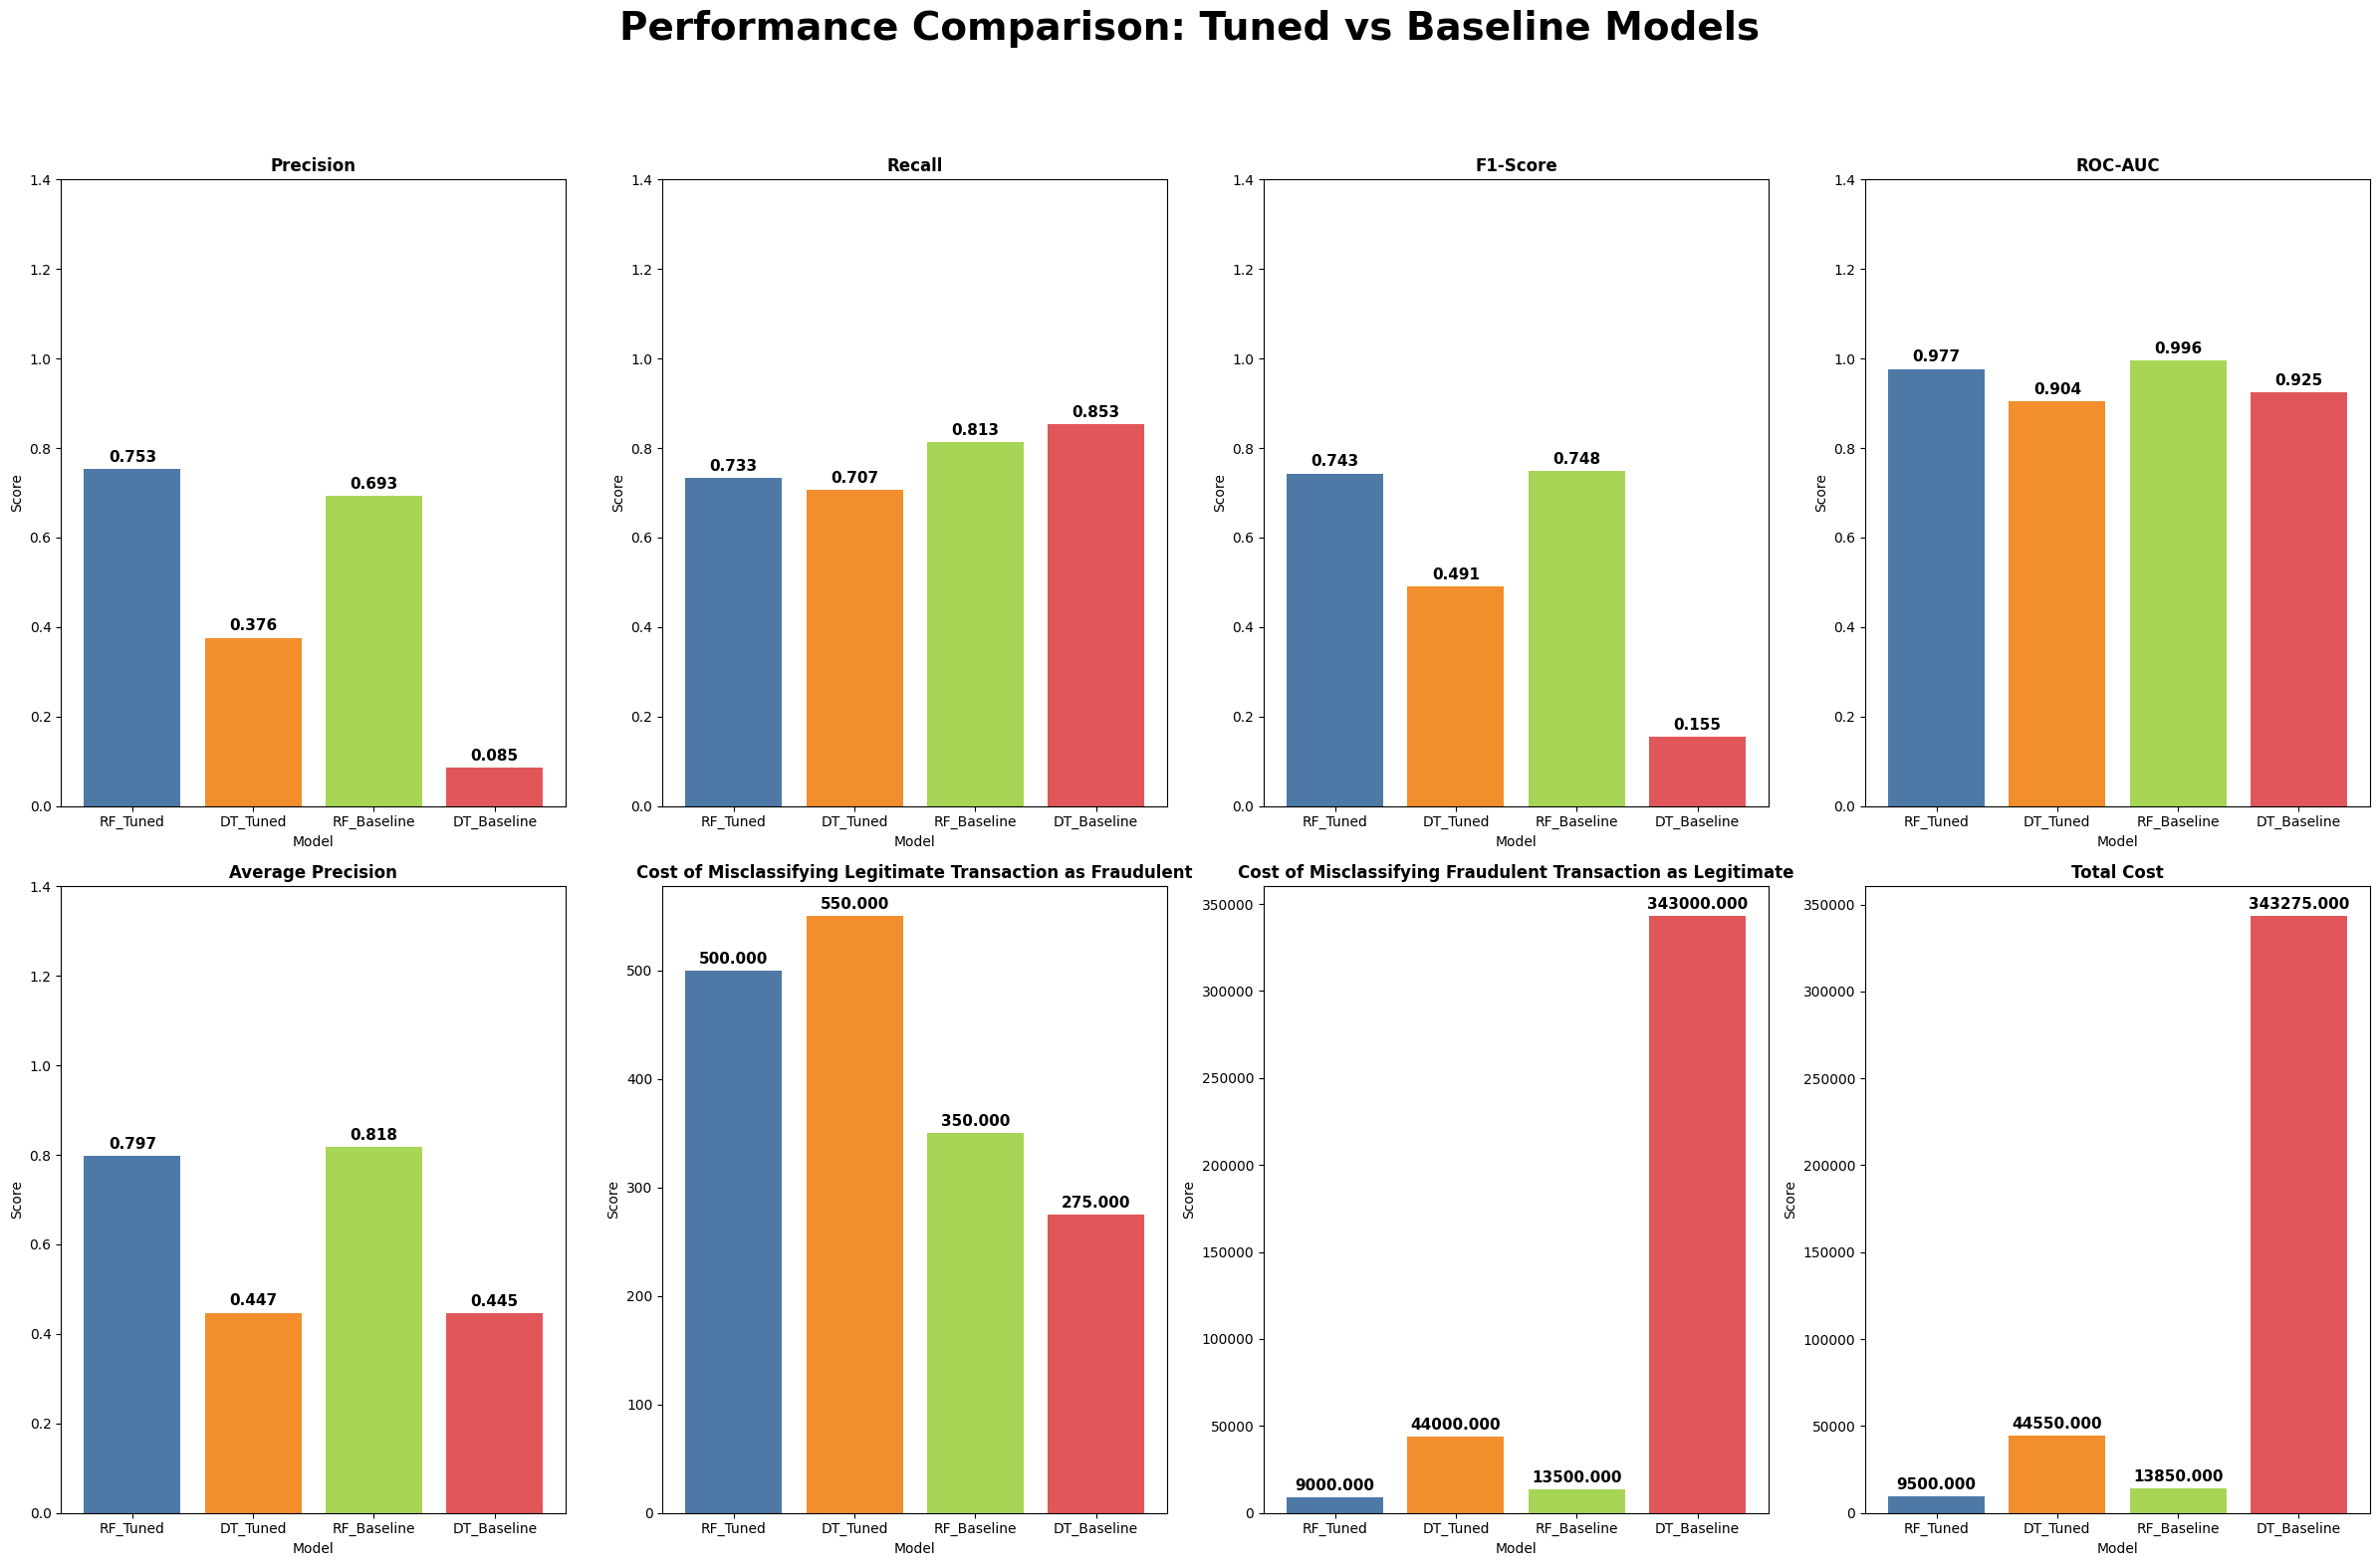

In [153]:
# load the JSON file
with open('../models/performance_metrics_selected_models.json', 'r') as f:
    performance_metrics_tm = json.load(f)
with open('../models/performance_metrics_selected_models_baseline.json', 'r') as f:
    performance_metrics_bm = json.load(f)

tuned_models = pd.DataFrame(performance_metrics_tm)
baseline_models = pd.DataFrame(performance_metrics_bm)
tuned_models.columns = ['RF_Tuned', 'DT_Tuned']
baseline_models.columns = ['RF_Baseline', 'DT_Baseline']

dataframe = pd.concat([tuned_models, baseline_models],axis=1)
cm_dataframe = dataframe.loc['Cost Matrix']
dataframe = dataframe.drop(index='Cost Matrix')
dataframe = dataframe.rename(index={'Cost 1': 'Cost of Misclassifying Legitimate Transaction as Fraudulent',
                                    'Cost 2': 'Cost of Misclassifying Fraudulent Transaction as Legitimate'
                                    })
# display(dataframe)
metrics_to_plot = dataframe.index

fig, axes3 = plt.subplots(2, 4, figsize=(24, 16))

for i, metric in enumerate(metrics_to_plot):
    if metric in dataframe.index:
        values = dataframe.loc[metric]
        bars = axes3[i//4,i%4].bar(values.index, values.values, color=['#4e79a7', '#f28e2b', '#a7d656', '#e15759'])
        axes3[i//4,i%4].set_title(metric, fontweight='bold')
        if i<5:
            axes3[i//4,i%4].set_ylim(0, 1.4)
        # else:
        #     axes3[i//4,i%4].set_ylim(0, 1.4)
        axes3[i//4,i%4].set_ylabel('Score')
        axes3[i//4,i%4].set_xlabel('Model')
        # Add value labels 
        for bar in bars:
            height = bar.get_height()
            axes3[i//4,i%4].annotate(f'{height:.3f}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords="offset points",
                             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.suptitle("Performance Comparison: Tuned vs Baseline Models", fontsize=28, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

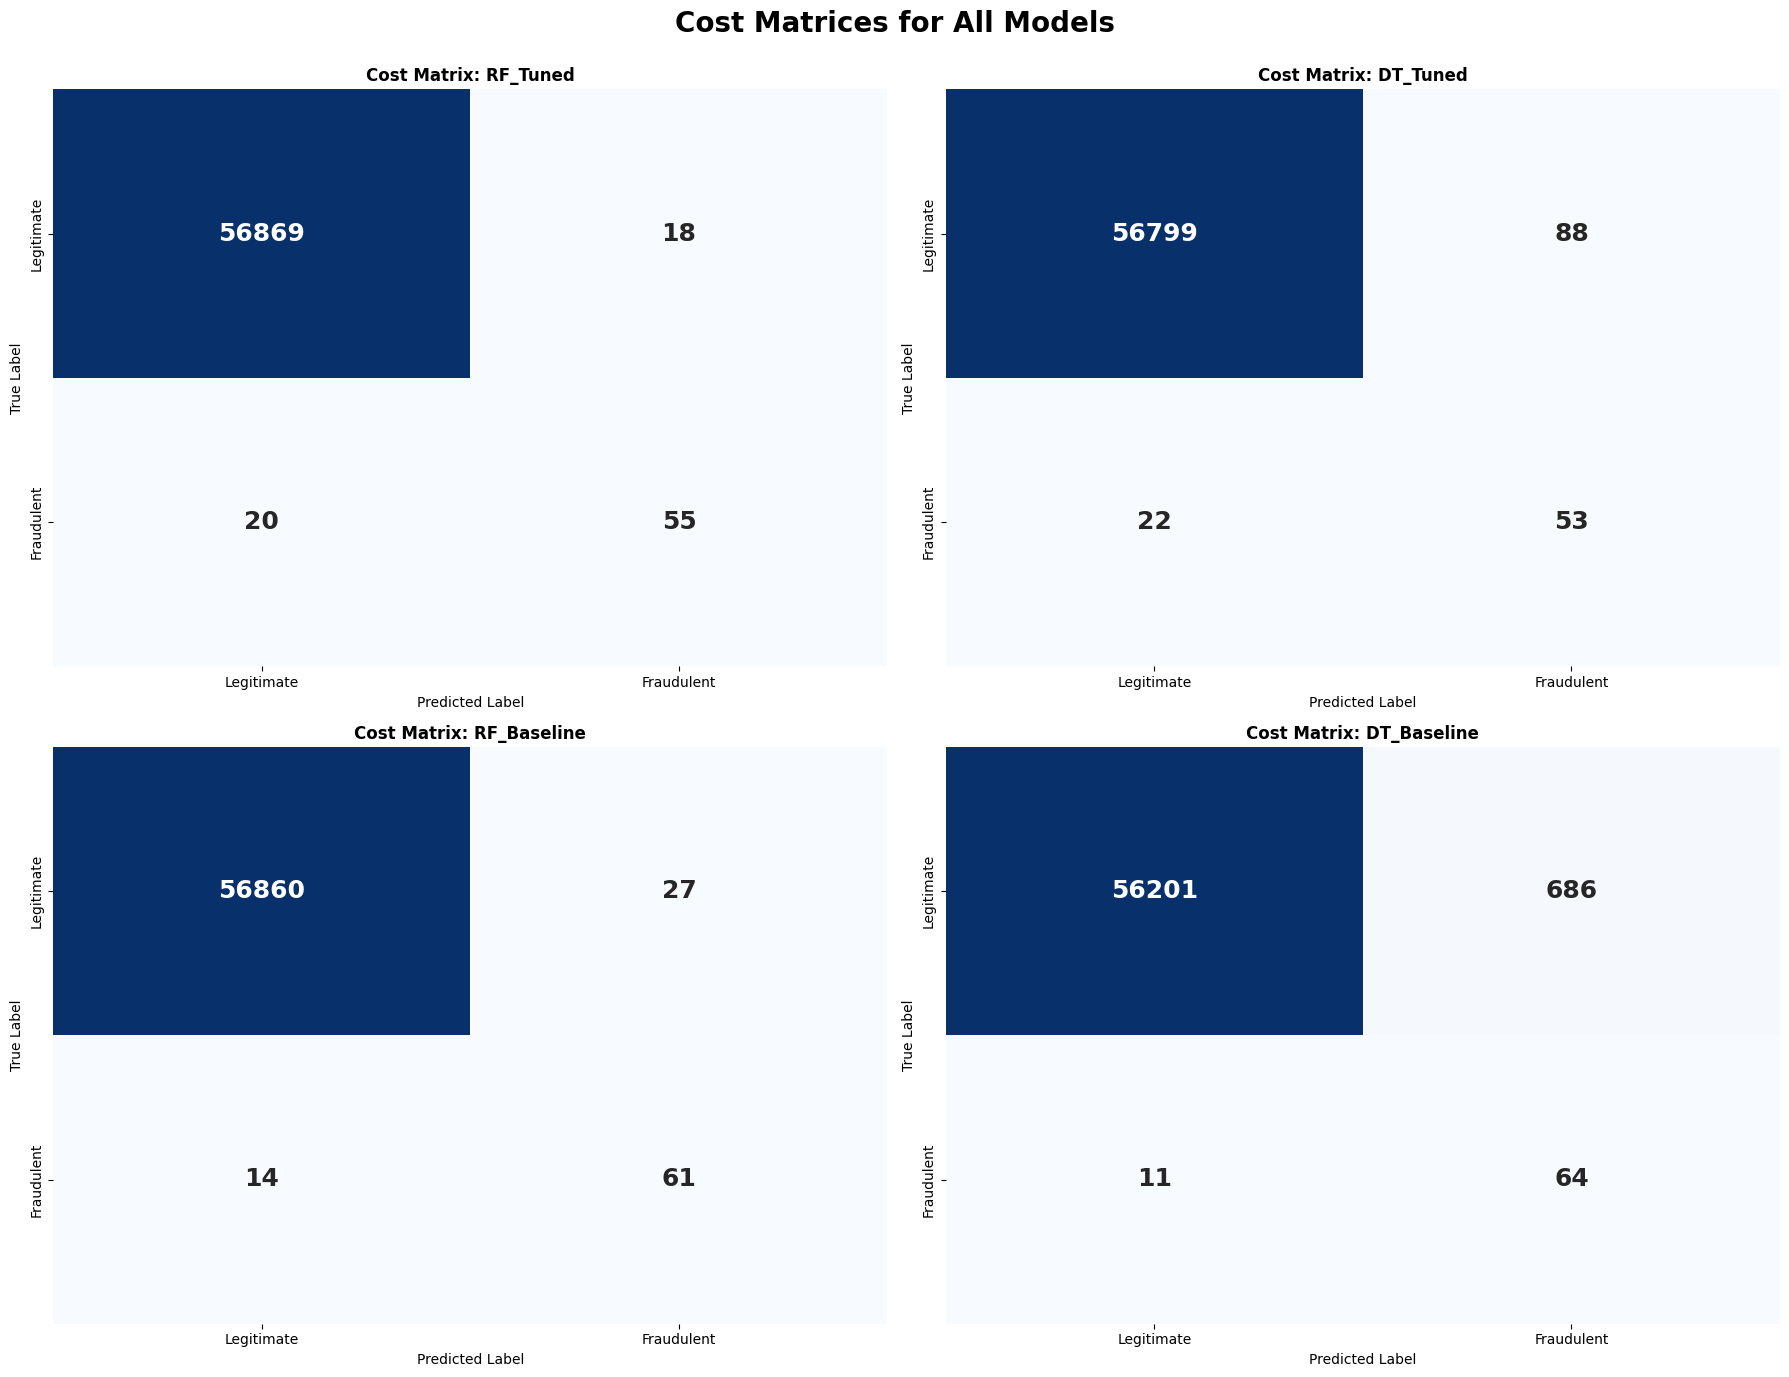

In [163]:
# Plot confusion matrices for all 4 models
fig, axes6 = plt.subplots(2, 2, figsize=(18, 14))
axes6 = axes6.flatten()

# cm_dataframe is assumed to be a DataFrame with 4 cost matrices (one per model)
for i, (model_name, cm) in enumerate(cm_dataframe.items()):
    sns.heatmap(np.array(cm), annot=True,
                fmt='d', cmap='Blues', 
                cbar=False, ax=axes6[i],
                annot_kws={"size": 18, "weight": "bold"},
                xticklabels=['Legitimate', 'Fraudulent'],
                yticklabels=['Legitimate', 'Fraudulent'])
    axes6[i].set_title(f'Cost Matrix: {model_name}', fontweight='bold')
    axes6[i].set_xlabel('Predicted Label')
    axes6[i].set_ylabel('True Label')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Cost Matrices for All Models", fontsize=20, fontweight='bold')
plt.show()

The above cost matrix helps in calculation of misclassification costs depicted in the above cells.

## Feature Importance
Since tree based models are being used, it is essential to analyse the importance for each feature.<br>
Here we analyse features of tuned models since it is evident from the above plots that baseline models do not perform well for our application.

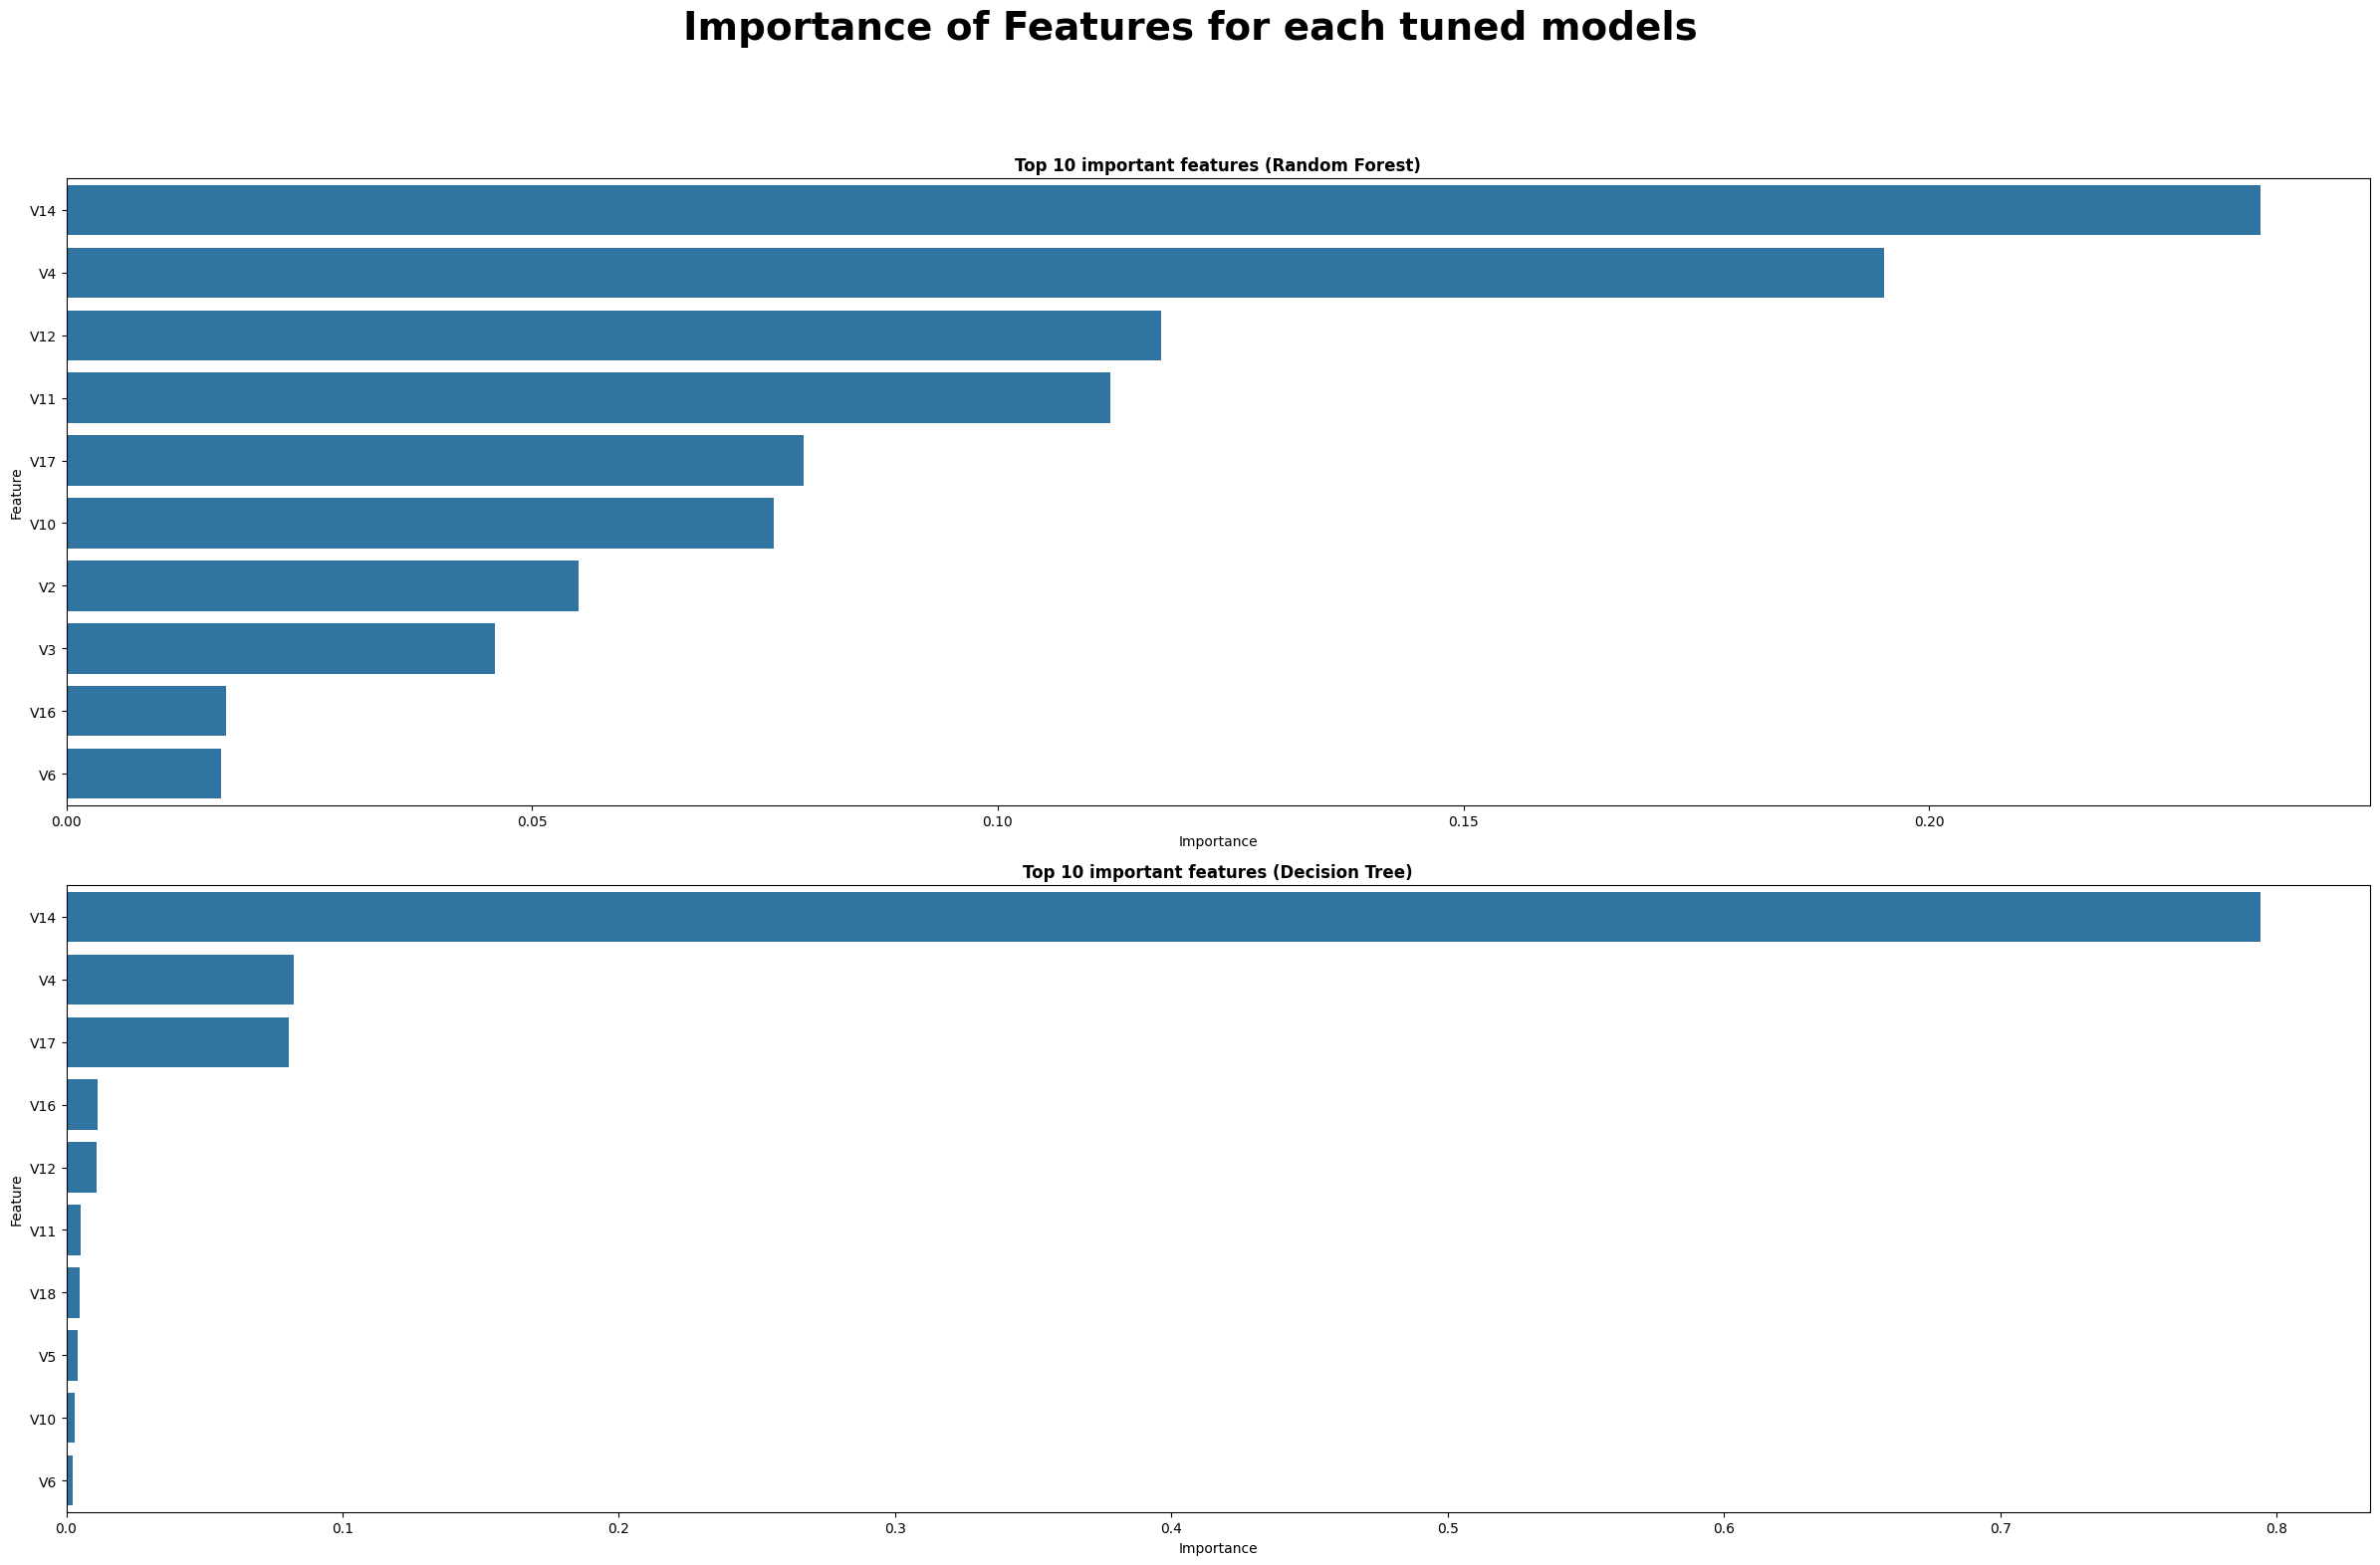

In [133]:
# load JSON file
with open('../models/feature_importances.json', 'r') as f:
    feature_importances = json.load(f)

# plot for visualization
fig,axes4 = plt.subplots(2,1,figsize=(24,16))

for i, model_name in enumerate(feature_importances.keys()):
    # print(model,i)
    sns.barplot(data=pd.DataFrame(feature_importances[model_name]).sort_values(by = 'Importance', ascending = False).head(10),
                x = 'Importance', y = 'features', ax = axes4[i])
    axes4[i].set_title(f"Top 10 important features ({model_name})",fontweight='bold')
    axes4[i].set_xlabel("Importance")
    axes4[i].set_ylabel("Feature")

plt.suptitle("Importance of Features for each tuned models", fontsize=28, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

From all the above plots, it might be tempting to conclude that Random Forest is the best performing model here, and it's true. But before diving into conclusions, it is better to visualize Precision-Recall Curves and ROC-AUC.<br>
## ROC-AUC and Precision-Recall Curves
ROC-AUC, Precision-Recall Curves and Performance Metrics Comparision is depicted below to visualize the models better so that we don't miss out on these metrics before diving into conclusions.

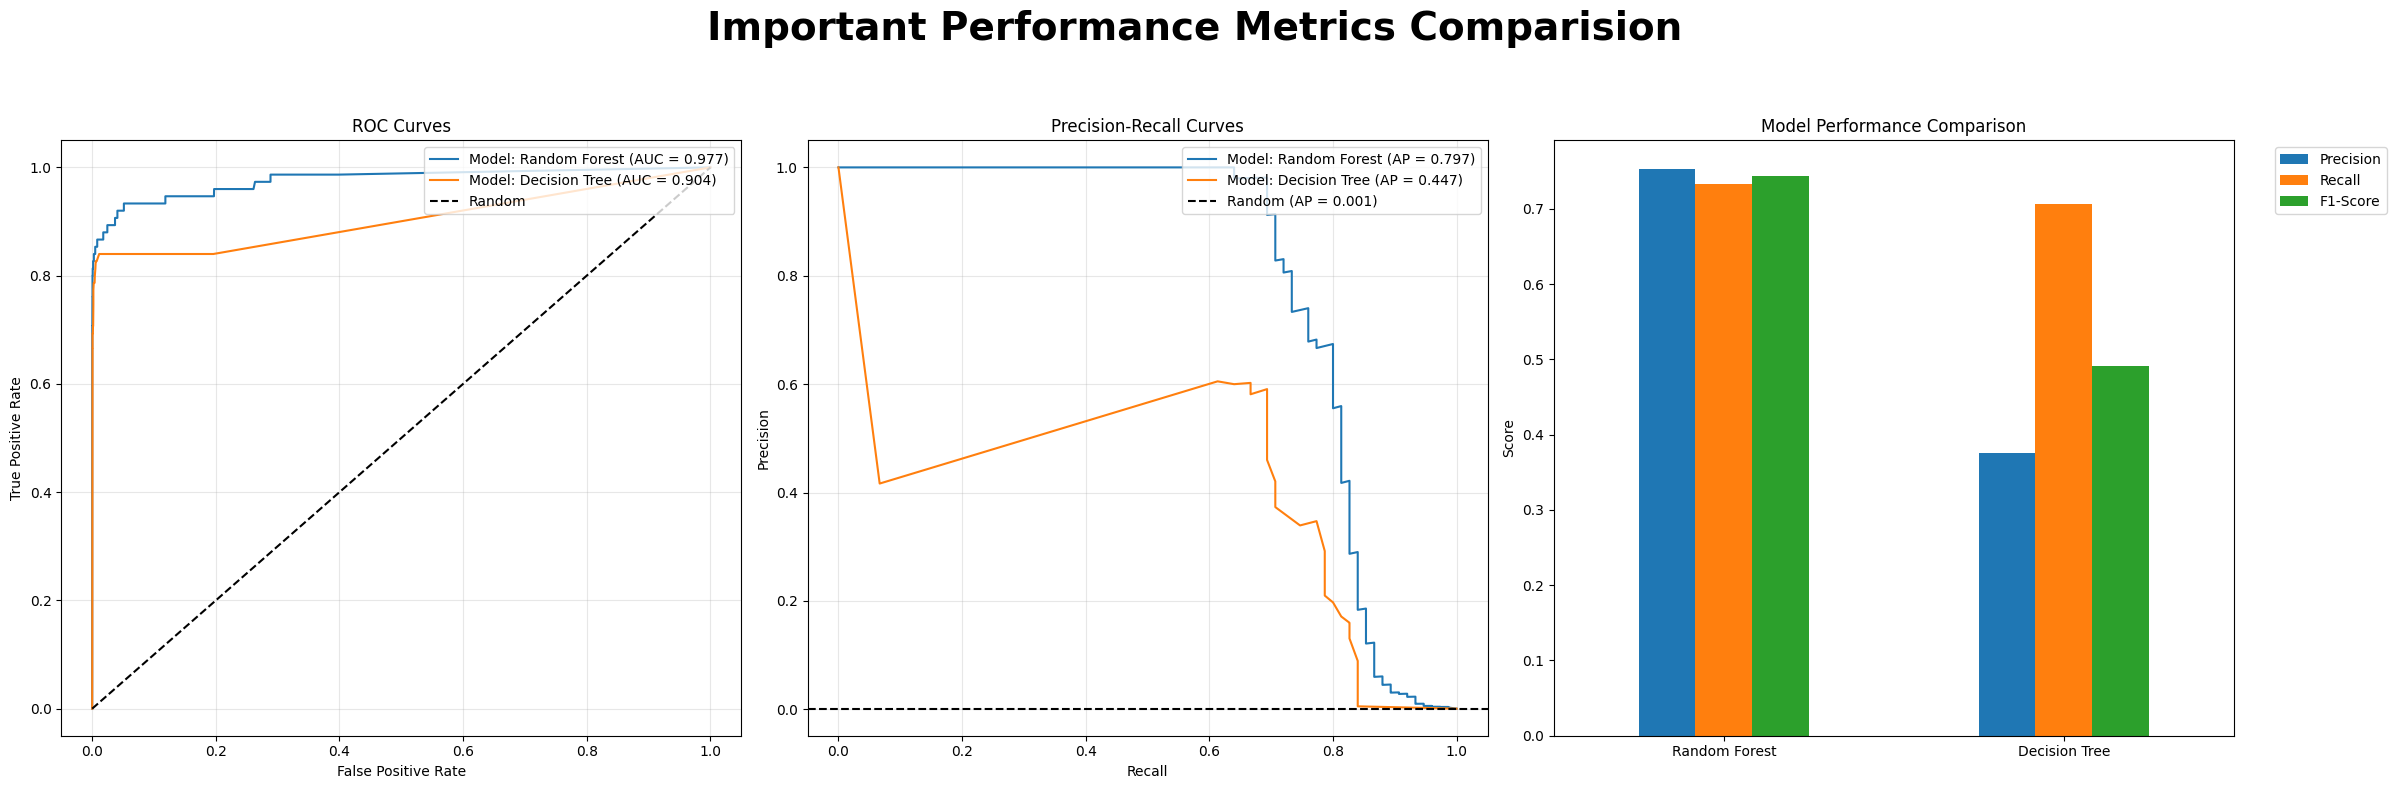

In [147]:
# load the tuned models

import joblib

rf_tuned = joblib.load('../models/tuned_rf.pkl')
dt_tuned = joblib.load('../models/tuned_dt.pkl')

tuned_models = {'Random Forest': rf_tuned,
                'Decision Tree': dt_tuned}

# load data and extract test data points
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
                             roc_auc_score, roc_curve,
                             average_precision_score,
                             precision_recall_curve)

df = pd.read_csv('../data/creditcard.csv')
insights = json.load(open('../data/eda_insights.json'))

X = df.drop(columns=['Class'])
y = df['Class']
top_features = insights['top_15_features']
X_selected = X[top_features]
df_sorted = df.sort_values(by='Time').reset_index(drop=True)
X_sorted = df_sorted[top_features]
y_sorted = df_sorted['Class']
X_train, X_test, y_train, y_test = train_test_split(X_sorted, y_sorted, test_size=0.2, shuffle=False)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ROC Curves

fig, axes5 = plt.subplots(1,3,figsize=(24,8))
# calculate TPRs, FPRs and AUCs
for i, (model_name,model) in enumerate(tuned_models.items()):
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr,tpr,_ = roc_curve(y_test,y_prob)
    # print(fpr,tpr)
    auc_score = roc_auc_score(y_test,y_prob)
    # print(auc_score)
    # axes5[i].plot(fpr, tpr)
    # axes5[i].set_title(f"ROC Curve for {model_name}",fontweight='bold')
    # axes5[i].set_xlabel(f"False Positive Rates(FPR)")
    # axes5[i].set_ylabel(f"True Positive Rates(TPR)")
    axes5[0].plot(fpr,tpr,label = f"Model: {model_name} (AUC = {auc_score:.3f})")
axes5[0].plot([0, 1], [0, 1], 'k--', label='Random')
axes5[0].set_xlabel('False Positive Rate')
axes5[0].set_ylabel('True Positive Rate')
axes5[0].set_title('ROC Curves')
axes5[0].legend(loc = 'upper right')
axes5[0].grid(True, alpha=0.3)

# Precision-Recall curves

for i, (model_name,model) in enumerate(tuned_models.items()):
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    precision, recall, _ = precision_recall_curve(y_test,y_prob)
    avg_precision = average_precision_score(y_test,y_prob)
    axes5[1].plot(recall, precision, label = f"Model: {model_name} (AP = {avg_precision:.3f})")

# baseline
fraud_rate = y_test.sum()/len(y_test)
axes5[1].axhline(y=fraud_rate, color='k', linestyle='--', label=f'Random (AP = {fraud_rate:.3f})')
axes5[1].set_xlabel('Recall')
axes5[1].set_ylabel('Precision')
axes5[1].set_title('Precision-Recall Curves')
axes5[1].legend(loc = 'upper right')
axes5[1].grid(True, alpha=0.3)

# Performance Comparision
with open('../performance-measures/final_results.json', 'r') as f:
    final_results = json.load(f)
metrics_comparision = pd.DataFrame(final_results).T
metrics_comparision = metrics_comparision[['Precision','Recall','F1-Score']].copy()
metrics_comparision.plot(kind='bar', ax=axes5[2])
axes5[2].set_title('Model Performance Comparison')
axes5[2].set_ylabel('Score')
axes5[2].tick_params(axis='x', rotation=0)
axes5[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle("Important Performance Metrics Comparision", fontsize=28, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

It is now ok to conclude that Random Forest with tuned parameters is the best performing model !